In [1]:
!pip install gdown

!pip install Cython --install-option="--no-cython-compile"
!pip install fasttext

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
     |████████████████████████████████| 71kB 3.5MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3043198 sha256=84d60a7abe4db9f21e9f54d18bdc2ac5f45660d4ed28c4488be5832f19675d37
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [2]:
!gdown https://drive.google.com/uc?id=1NNpbV5N9MDj4vn-k5ANT1nqY9-z_vGRa
!gdown https://drive.google.com/uc?id=18iBU4VFLg8zCrh5iZ66mbLJ51iJaWs4Z

Downloading...
From: https://drive.google.com/uc?id=1NNpbV5N9MDj4vn-k5ANT1nqY9-z_vGRa
To: /content/test.csv
100% 331k/331k [00:00<00:00, 49.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=18iBU4VFLg8zCrh5iZ66mbLJ51iJaWs4Z
To: /content/train.csv
100% 974k/974k [00:00<00:00, 62.5MB/s]


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#some libraries cause this future warnings when the newer versions will be released. To prevent showing them, this code is used.

# FASTTEXT OVERVIEW

In [4]:
# download pre-trained language word vectors from one of 157 languages  https://fasttext.cc/docs/en/crawl-vectors.html
# it will take some time, about 10-15 minutes
import fasttext
import fasttext.util
fasttext.util.download_model('tr', if_exists='ignore')  # Turkish
ft = fasttext.load_model('cc.tr.300.bin')

All word vectors are 300 dimensional dense vectors. It is possible to shrink the dimension to 100 with ``` fasttext.util.reduce_model(ft, 100) ``` We use the 300d vectors. If you try out the 50d or 100d vectors, they basically work for similarity fastly but clearly aren't as good for analogy problems compared to 300d vectors. 

In [5]:
ft.get_word_vector('kitap').shape

(300,)

Thanks to these dense vectors, semantic and syntactic similarities can be captured between the words because the similar word vectors are closer to each other in the 300-d vector space compared to different words

In [14]:
ft.get_nearest_neighbors('köpek', k=3) #top 3 similar word for köpek: as seen, köpeğin & köpekler (syntactic similarity) and kedi (semantic similarity)

[(0.7917917370796204, 'köpeğin'),
 (0.7857047319412231, 'kedi'),
 (0.7675947546958923, 'köpekler')]

In [24]:
ft.get_nearest_neighbors('kırmızı',k=3)

[(0.8232569098472595, 'sarı'),
 (0.7779312133789062, 'kırmız'),
 (0.7613704800605774, 'turuncu')]

By utilizing this relationships, it is possible to create both syntactic and semantic analogies.

In [8]:
#semantic analogies
ft.get_analogies('kral', 'erkek', 'kadın',k=1)

[(0.6636754870414734, 'kral.')]

In [9]:
#syntactic analogies
ft.get_analogies('uzun', 'uzunluk', 'kalınlık',k=1)

[(0.647826611995697, 'uzunca')]

Let's see the words and their positions in the 2-dimensional vector space by using dimension reduction techniques (PCA)!

In [25]:
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def display_pca_scatterplot(model, words):
       
    word_vectors = np.array([model.get_word_vector(w) for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(16,16))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()



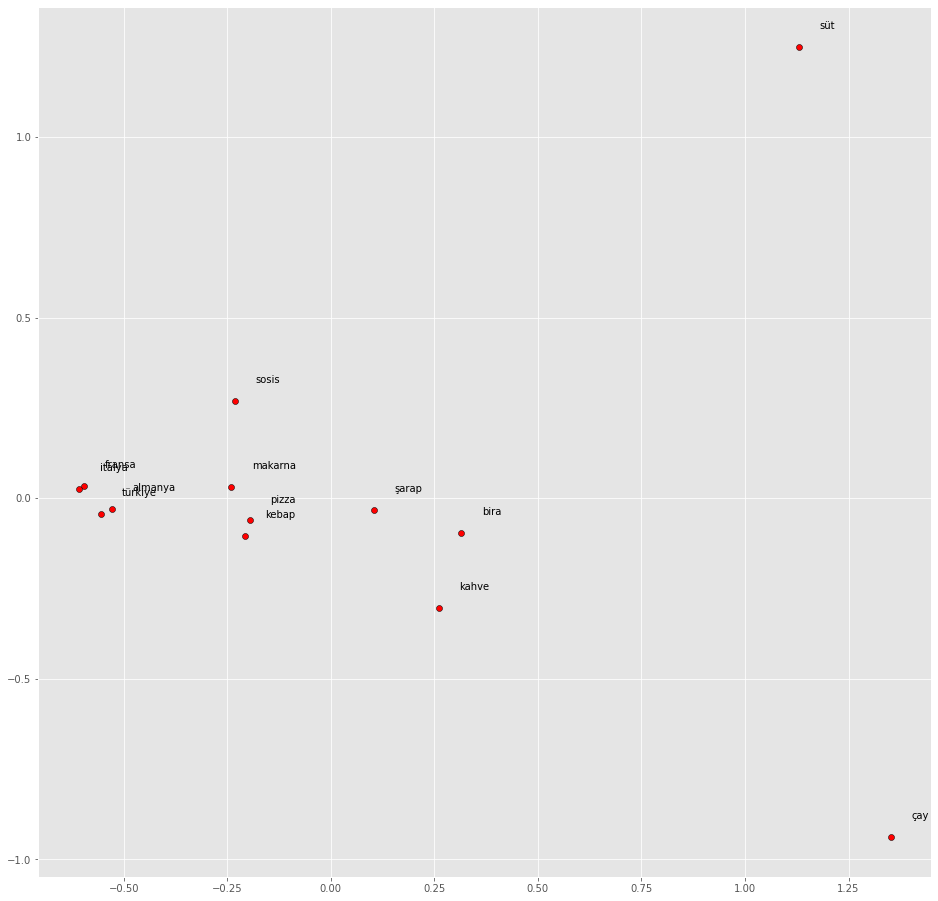

In [26]:
words=['kahve', 'çay', 'bira', 'şarap', 'süt',
      'makarna', 'sosis', 'pizza', 'kebap', 
      'fransa', 'italya', 'almanya', 'türkiye']
display_pca_scatterplot(ft,words)

#  kitapyurdu.com - REVEWS AND RATINGS DATASET

Original kitapyurdu.com dataset contains around 125K reviews and ratings. However, training the model with this amount takes a lot of time. Therefore, we previously prepare the data as highly balanced and smaller size. The reason for that **handling imbalanced data is advanced topic, if you are interestedn in this, [you can follow this paper.](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5128907)** The script includes data preparation steps will be shared with participants after the workshop.

In [27]:
import pandas as pd
df_train = pd.read_csv(r"train.csv",index_col=[0])
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df_train.shape[0]))
print()
print(df_train["label"].value_counts())
df_test = pd.read_csv(r"test.csv",index_col=[0])
# Report the number of sentences.
print()
print('Number of test sentences: {:,}\n'.format(df_test.shape[0]))
print()
print(df_test["label"].value_counts())

Number of training sentences: 7,050


2    2350
1    2350
0    2350
Name: label, dtype: int64

Number of test sentences: 2,400


1    800
2    800
0    800
Name: label, dtype: int64


**Classes:**



0.   Negative
1.   Neutral
2.   Positive


In [28]:
df_train.head()

,review,label
0,Kitabı bugün 3. defa kaldığım yerden devam etm...,0
1,Stefan zweig’in en sevdiğim özelliği basit cüm...,0
2,Her yerde karşıma çıktığı için almıştım .Norma...,0
3,kitapların damağımızda bıraktığı tadı paylaşab...,0
4,Çocukken okumuş ve feci sıkılarak yarım bırakm...,0


In [29]:
df_test.head()

,review,label
0,Şunu söylemekte fayda görüyorum yazar ile bizi...,0
1,çok sarmadı beni bitirmek için seriyi başladım...,0
2,köşe yazısı gibi zaman israfı keşke bir kez da...,0
3,Kişiler cok oldugu için kafanı karıştırıyor ak...,0
4,BEKLENTİMİ KARŞILAYAN BİR KİTAP OLMADI..,0


## TEXT PREPROCESSING

In [30]:
 df_train.review[0]

'Kitabı bugün 3. defa kaldığım yerden devam etmek için elime aldım. Ancak yine daha iyi anlamak için baştan başladım(3. defa). Hatta kararsızım okuyup okumamakta, çünkü bir türlü ilerleyemiyorum kitapta bayağı sıkıyor beni. Hadi bakalım inşallah bu sefer bitireceğim kitabı. Son yapılan yoruma istinaden umarım 140. sayfadan sonra ben de aynı düşüncelere sahip olurum.'

In [32]:
import numpy as np 
import nltk
import string as s
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix,classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
def preprocess(text,remove_stop_punc=False):
  text=text.lower()
  
  text=text.replace("\n"," ")
  #removing URL
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'http?:\/\/.*[\r\n]*', '', text)

  #Replace &amp, &lt, &gt with &,<,> respectively
  text=text.replace(r'&amp;?',r'and')
  text=text.replace(r'&lt;',r'<')
  text=text.replace(r'&gt;',r'>')

  #remove hashtags
  text=re.sub(r"#[A-Za-z0-9]+","",text)   
  #remove \
  text=re.sub(r"\\ "," ",text)
 
  #remove punctuations and stop words
  stop_words=stopwords.words('english')
  tokens=nltk.word_tokenize(text)
  if remove_stop_punc:
    tokens_new=[i for i in tokens if not i in stop_words and i.isalpha()] #isalpha() method returns True if all the characters are alphabet letters
  else:
    tokens_new=tokens

  #remove excess whitespace
  text= ' '.join(tokens_new)
  return text

df_train["review"]=df_train["review"].apply(preprocess,remove_stop_punc=False)
df_test["review"]=df_test["review"].apply(preprocess,remove_stop_punc=False)

#Remove reviews which have no word in them
df_train["Text_length"] = [len(text.split(' ')) for text in df_train.review]
df_train = df_train[df_train["Text_length"]>1]

#Remove reviews which have no word in them
df_test["Text_length"] = [len(text.split(' ')) for text in df_test.review]
df_test = df_test[df_test["Text_length"]>1]

In [34]:
df_test.shape

(2400, 3)

In [35]:
df_train.review[0]

'kitabı bugün 3. defa kaldığım yerden devam etmek için elime aldım . ancak yine daha iyi anlamak için baştan başladım ( 3. defa ) . hatta kararsızım okuyup okumamakta , çünkü bir türlü ilerleyemiyorum kitapta bayağı sıkıyor beni . hadi bakalım inşallah bu sefer bitireceğim kitabı . son yapılan yoruma istinaden umarım 140. sayfadan sonra ben de aynı düşüncelere sahip olurum .'

##### **BEFORE PREPROCESSING:**

> Kitabı bugün 3. defa kaldığım yerden devam etmek için elime aldım. Ancak yine daha iyi anlamak için baştan başladım(3. defa). Hatta kararsızım okuyup okumamakta, çünkü bir türlü ilerleyemiyorum kitapta bayağı sıkıyor beni. Hadi bakalım inşallah bu sefer bitireceğim kitabı. Son yapılan yoruma istinaden umarım 140. sayfadan sonra ben de aynı düşüncelere sahip olurum.



# FEATURE EXTRACTION WITH FASTTEXT

To obtain sentence or news vector representations, the aggregation of word vectors is required. There are lots of approaches in the applications. In this workshop, we will take average of word vectors to represent news. 

Also, unlike **Word2Vec**, in the related function, no need to try/except block because Fasttext works character level and it does not very like to out-of-vocabulary problem which can occur if words do not exist.

In [36]:
from nltk.tokenize import WordPunctTokenizer
WPT = WordPunctTokenizer()

def news_embed(sentence):
    sentence=sentence.lower()
    tokens=WPT.tokenize(sentence)
    new_tokens=[token for token in tokens]
    sent_list=[]
    
    for word in new_tokens:
        wv=ft.get_word_vector(word)
        sent_list.append(wv)
    sent_embed= np.mean(sent_list,axis=0)
    return sent_embed


In [37]:
sentence="Principai offers customized NLP solutions"

In [38]:
a=news_embed(sentence)
a.shape

(300,)

In [39]:
type(a)

numpy.ndarray

In [40]:
texts = df_train.review
labels = df_train.label

from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(texts, labels, random_state=42, test_size=0.2)

test_x=df_test.review
test_y=df_test.label

In [41]:
train_array=np.array([news_embed(news) for news in train_x])
valid_array=np.array([news_embed(news) for news in valid_x])
test_array=np.array([news_embed(news) for news in test_x])
train_array.shape

(5640, 300)

# MODELLING

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). However, **it requires non-negative inputs.** Since dense vectors may have negative values, we will apply Linear Support Vector Classifier algorithm via [sci-kit learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) library.

In [42]:
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=0)
model.fit(train_array, train_y)
pred=model.predict(valid_array)
from sklearn.metrics import accuracy_score,confusion_matrix
print("\nAccuracy of W2V and LinearSVC over validation set is:",accuracy_score(valid_y, pred))

print(classification_report(valid_y, pred))


Accuracy of W2V and LinearSVC over validation set is: 0.5723404255319149
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       490
           1       0.46      0.35      0.40       469
           2       0.63      0.73      0.68       451

    accuracy                           0.57      1410
   macro avg       0.56      0.57      0.56      1410
weighted avg       0.56      0.57      0.56      1410



#TESTING THE MODEL

In [43]:
test_pred=model.predict(test_array)

from sklearn.metrics import accuracy_score,confusion_matrix
print("\nAccuracy of W2V and LinearSVC over test set is:",accuracy_score(test_y, test_pred))

print(classification_report(test_y, test_pred))


Accuracy of W2V and LinearSVC over test set is: 0.57875
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       800
           1       0.48      0.40      0.44       800
           2       0.66      0.74      0.70       800

    accuracy                           0.58      2400
   macro avg       0.57      0.58      0.57      2400
weighted avg       0.57      0.58      0.57      2400



<Figure size 432x288 with 0 Axes>

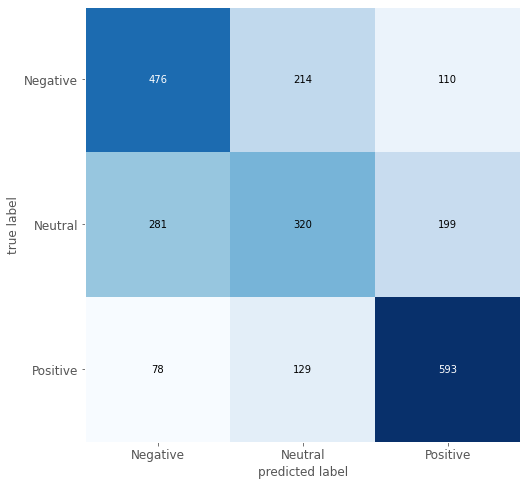

In [44]:
cm  = confusion_matrix(test_y, test_pred)
labels = ['Negative', 'Neutral', 'Positive']
from mlxtend.plotting import plot_confusion_matrix
plt.figure()
plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), labels, fontsize=12)
plt.yticks(range(3), labels, fontsize=12)
plt.show()